In [9]:
import os
import shutil

# Original dataset path
src_path = r"D:\Brain_Tumor_Classification (MRI)\Testing"
dst_path = r"D:\Brain_Tumor_Classification (MRI)\Training_Dataset"

# Create new folders
os.makedirs(os.path.join(dst_path, "tumor"), exist_ok=True)
os.makedirs(os.path.join(dst_path, "no_tumor"), exist_ok=True)

# Go through each class folder
for cls in os.listdir(src_path):
    cls_path = os.path.join(src_path, cls)
    if not os.path.isdir(cls_path):
        continue
    
    if cls.lower() == "no_tumor":  
        # Copy no_tumor images
        for img in os.listdir(cls_path):
            shutil.copy(os.path.join(cls_path, img), os.path.join(dst_path, "no_tumor"))
    else:
        # Copy glioma, meningioma, pituitary into "tumor"
        for img in os.listdir(cls_path):
            shutil.copy(os.path.join(cls_path, img), os.path.join(dst_path, "tumor"))

print("✅ Dataset merged into Binary_Dataset (tumor / no_tumor).")


✅ Dataset merged into Binary_Dataset (tumor / no_tumor).


In [10]:
import os
import shutil

# Original dataset path
src_path = r"D:\Brain_Tumor_Classification (MRI)\Testing"
dst_path = r"D:\Brain_Tumor_Classification (MRI)\Testing_Dataset"

# Create new folders
os.makedirs(os.path.join(dst_path, "tumor"), exist_ok=True)
os.makedirs(os.path.join(dst_path, "no_tumor"), exist_ok=True)

# Go through each class folder
for cls in os.listdir(src_path):
    cls_path = os.path.join(src_path, cls)
    if not os.path.isdir(cls_path):
        continue
    
    if cls.lower() == "no_tumor":  
        # Copy no_tumor images
        for img in os.listdir(cls_path):
            shutil.copy(os.path.join(cls_path, img), os.path.join(dst_path, "no_tumor"))
    else:
        # Copy glioma, meningioma, pituitary into "tumor"
        for img in os.listdir(cls_path):
            shutil.copy(os.path.join(cls_path, img), os.path.join(dst_path, "tumor"))

print("✅ Dataset merged into Binary_Dataset (tumor / no_tumor).")


✅ Dataset merged into Binary_Dataset (tumor / no_tumor).


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    r"D:\Brain_Tumor_Classification (MRI)\Training_Dataset",
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",   # 🔥 Now only 0 or 1
    subset="training"
)

val_data = datagen.flow_from_directory(
    r"D:\Brain_Tumor_Classification (MRI)\Testing_Dataset",
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)


Found 2389 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [19]:
import os

dataset_path_Training_data = r"D:\Brain_Tumor_Classification (MRI)\Training_Dataset"

tumor_count = len(os.listdir(os.path.join(dataset_path_Training_data, "tumor")))
no_tumor_count = len(os.listdir(os.path.join(dataset_path_Training_data, "no_tumor")))

print(f"Tumor images: {tumor_count}")
print(f"No Tumor images: {no_tumor_count}")


Tumor images: 2590
No Tumor images: 396


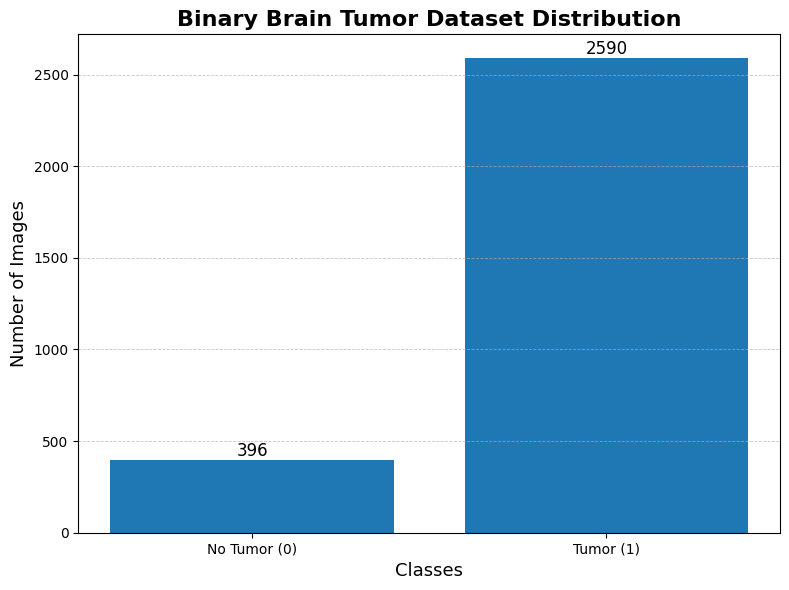

In [20]:
import matplotlib.pyplot as plt

classes = ['No Tumor (0)', 'Tumor (1)']
counts = [no_tumor_count, tumor_count]

plt.figure(figsize=(8,6))

# Bar chart
bars = plt.bar(classes, counts)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, 
             str(yval), ha='center', va='bottom', fontsize=12)

# Titles and labels
plt.title("Binary Brain Tumor Dataset Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Classes", fontsize=13)
plt.ylabel("Number of Images", fontsize=13)

# Grid for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.7)

# Better layout
plt.tight_layout()

plt.show()


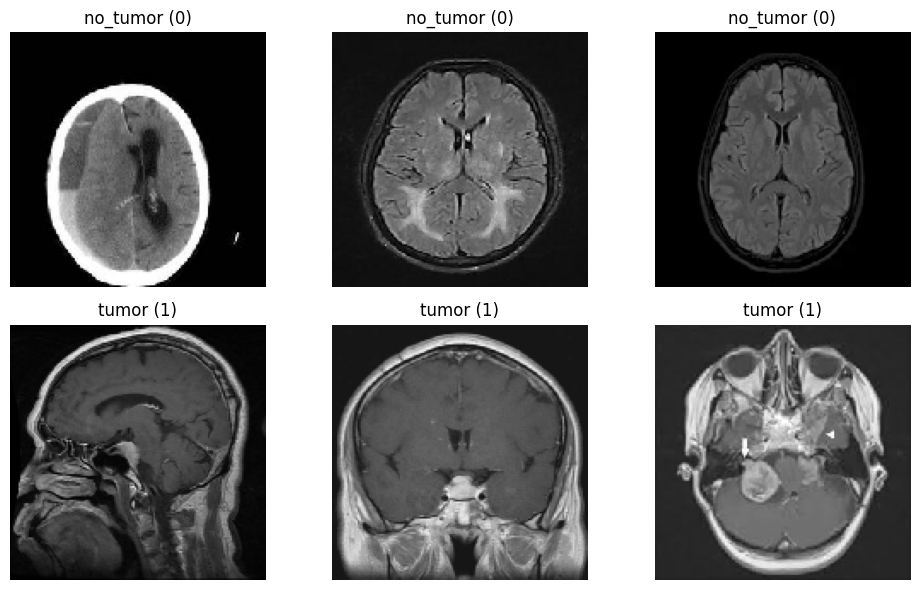

In [16]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Pick 3 images from each class
fig, axes = plt.subplots(2, 3, figsize=(10,6))

for i, cls in enumerate(['no_tumor', 'tumor']):
    class_path = os.path.join(dataset_path_Training_data, cls)
    imgs = os.listdir(class_path)[:3]  # first 3 images
    for j, img_name in enumerate(imgs):
        img_path = os.path.join(class_path, img_name)
        img = image.load_img(img_path, target_size=(150,150))
        axes[i,j].imshow(img)
        axes[i,j].axis('off')
        axes[i,j].set_title(f"{cls} ({i})")

plt.tight_layout()
plt.show()


In [21]:
import os

dataset_path_Testing_data = r"D:\Brain_Tumor_Classification (MRI)\Testing_Dataset"

tumor_count_Testing_data = len(os.listdir(os.path.join(dataset_path_Testing_data, "tumor")))
no_tumor_count__Testing_data = len(os.listdir(os.path.join(dataset_path_Testing_data, "no_tumor")))

print(f"Tumor images(Testing Data): {tumor_count_Testing_data}")
print(f"No Tumor images (Testing Data): {no_tumor_count__Testing_data}")


Tumor images(Testing Data): 115
No Tumor images (Testing Data): 105


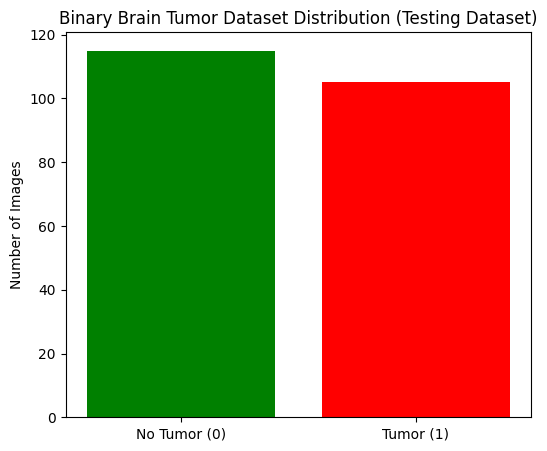

In [22]:
import matplotlib.pyplot as plt

classes = ['No Tumor (0)', 'Tumor (1)']
counts = [tumor_count_Testing_data, no_tumor_count__Testing_data]

plt.figure(figsize=(6,5))
plt.bar(classes, counts, color=['green','red'])
plt.title("Binary Brain Tumor Dataset Distribution (Testing Dataset)")
plt.ylabel("Number of Images")
plt.show()


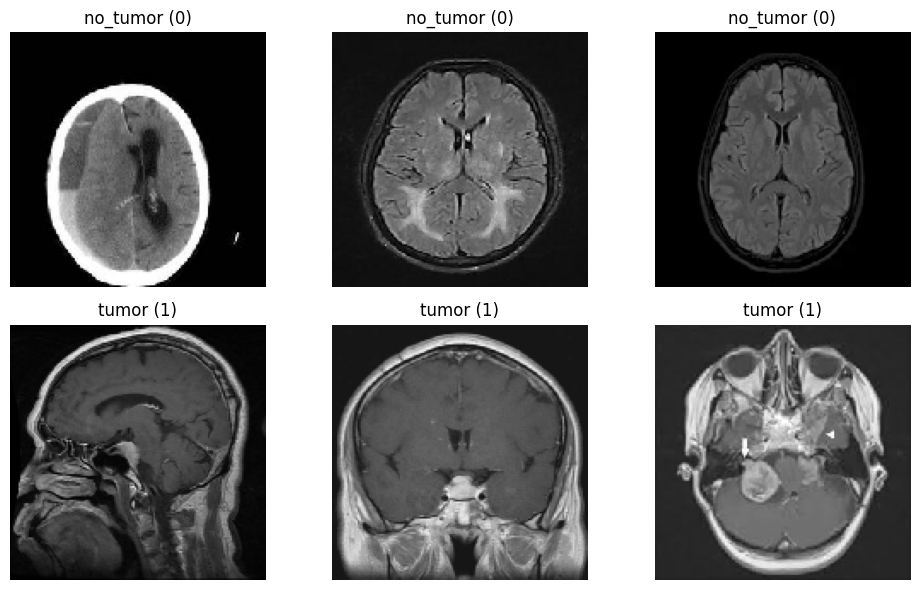

In [23]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Pick 3 images from each class
fig, axes = plt.subplots(2, 3, figsize=(10,6))

for i, cls in enumerate(['no_tumor', 'tumor']):
    class_path = os.path.join(dataset_path_Testing_data, cls)
    imgs = os.listdir(class_path)[:3]  # first 3 images
    for j, img_name in enumerate(imgs):
        img_path = os.path.join(class_path, img_name)
        img = image.load_img(img_path, target_size=(150,150))
        axes[i,j].imshow(img)
        axes[i,j].axis('off')
        axes[i,j].set_title(f"{cls} ({i})")

plt.tight_layout()
plt.show()


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='tanh'),
    MaxPooling2D(4,4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(1, activation='sigmoid')   #  only 1 neuron for binary output
])


c:\Users\User\anaconda3\envs\brain_tumor_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # since tumor vs no tumor (binary)
    metrics=['accuracy']
)


In [32]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20  # you can increase if accuracy is low
)


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 74s 939ms/step - accuracy: 0.8669 - loss: 0.4327 - val_accuracy: 0.5227 - val_loss: 0.8562
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 435ms/step - accuracy: 0.8828 - loss: 0.3006 - val_accuracy: 0.5000 - val_loss: 0.8236
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 438ms/step - accuracy: 0.8836 - loss: 0.2493 - val_accuracy: 0.5455 - val_loss: 0.8569
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 432ms/step - accuracy: 0.9154 - loss: 0.2083 - val_accuracy: 0.6591 - val_loss: 0.6762
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 443ms/step - accuracy: 0.9163 - loss: 0.1990 - val_accuracy: 0.7045 - val_loss: 0.7598
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 441ms/step - accuracy: 0.9188 - loss: 0.2040 - val_accuracy: 0.6591 - val_loss: 0.6650
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 452ms/step - accuracy: 0.9280 - loss: 0.1772 - val_accuracy: 0.5682 - val_loss: 0.6316
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 35s 460ms/step - accuracy: 0.9213 - loss: 0.1799 - val_accu

In [33]:
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc*100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9545 - loss: 0.2159
Validation Accuracy: 95.45%


In [ ]:
model.save("brain_tumor_cnn.h5")

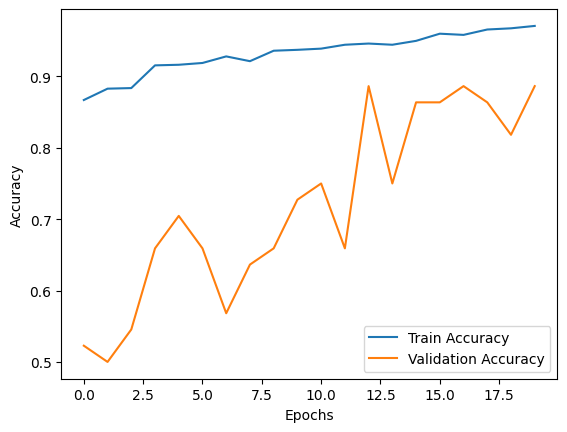

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [39]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path of a new MRI image
img_path = r"Training_Dataset\\tumor\\p (824).jpg"

# Load the image
img = image.load_img(img_path, target_size=(150,150))

# Convert to array
img_array = image.img_to_array(img)

# Scale values (same as rescale=1./255 in training)
img_array = img_array / 255.0

# Add batch dimension (model expects 4D: batch, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)


In [40]:
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:   # threshold 0.5
    print("Tumor Detected (1)")
else:
    print("No Tumor (0)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Tumor Detected (1)


In [ ]:
from tensorflow.keras.models import load_model

# Load the model from file
model = load_model("brain_tumor_cnn.h5")

# Use it for prediction
result = model.predict(img_array)
print(result)
if result[0][0] > 0.5:   # threshold 0.5
    print("Tumor Detected (1)")
else:
    print("No Tumor (0)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[[0.9925775]]
Tumor Detected (1)


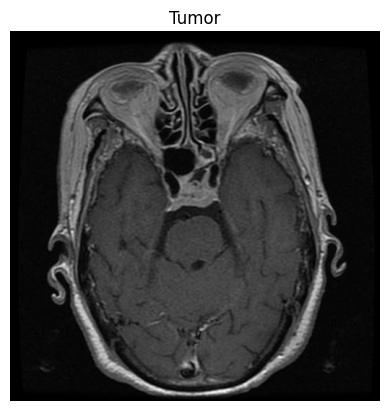

In [47]:
import matplotlib.pyplot as plt

plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.title("Tumor" if prediction[0][0] > 0.5 else "No Tumor")
plt.show()
 